<a href="https://www.kaggle.com/code/sonawanelalitsunil/indian-restaurant-2023-prediction?scriptVersionId=141286050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-restaurants-2023/restaurants.csv


##  IMPORT LIBRARIES

In [2]:
pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.2 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd                # for data manipulation and analysis
import numpy as np                 # for numerical computing
import matplotlib.pyplot as plt    # for data visualization
import seaborn as sns              # for advanced data visualization
import plotly.express as px
import plotly.graph_objects as go # FOR graph ploting

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
df = pd.read_csv('/kaggle/input/indian-restaurants-2023/restaurants.csv')

In [5]:
df.head(15)

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000
5,Ardor 2.1 Restaurant and Lounge,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Chine...",3.9,1391,2000
6,The Luggage Room By Sandoz,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Chine...",4.0,1022,1800
7,QBA,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Conti...",4.3,963,2100
8,My Bar Square,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, Italian, Chinese, Continental",3.9,506,1500
9,Ghoomar Traditional Thali Restaurant,"Connaught Place, Central Delhi",Central Delhi,Delhi,Rajasthani,4.2,712,1000


In [6]:
df.columns

Index(['Name', 'Location', 'Locality', 'City', 'Cuisine', 'Rating', 'Votes',
       'Cost'],
      dtype='object')

# CHECK ALL NULL VALUES

In [7]:
print(df.isnull().sum())

Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
dtype: int64


### OBSERVATION
#### AFTER THE EXPOLORING THE DATA SET, ITS OBSERVATION THAT THERE IS NO NULL VALUES IN PRESENT THE COLUMNS:

#### Name
#### Location
#### Locality
#### City
#### Cuisine
#### Rating
#### Votes
#### Cost

In [8]:
df.describe()

,Rating,Votes,Cost
count,6593.000000,6593.000000,6593.000000
mean,4.088200,119.420143,1102.798271
std,0.670031,261.849704,716.935212
min,1.000000,1.000000,100.000000
25%,3.900000,6.000000,500.000000
50%,4.200000,31.000000,900.000000
75%,4.400000,115.000000,1500.000000
max,5.000000,5016.000000,8000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


# COUNT CITY

In [10]:
df['City'].value_counts()

Bangalore     1019
Delhi          734
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      414
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Kochi            2
Name: City, dtype: int64

In [11]:
df['State'] = df['City']
df['State'] = df['City'].replace({'Bangalore': 'Karnataka','Delhi':'Delhi NCR', 'Mumbai': 'Maharashtra', 'Kolkata': 'Bengal',
'Hyderabad': 'Telangana','Ahmedabad': 'Gujrat','Chennai' : 'Tamil Nadu','Pune' : 'Maharashtra','Jaipur' : 'Rajasthan',
'Chandigarh' : 'Punjab','Indore' : 'Madhya Pradesh','Gurgaon' : 'Delhi NCR','Noida' : 'Delhi NCR','Vadodara' : 'Gujrat',
'Lucknow' : 'Uttar Pradesh','Agra' : 'Uttar Pradesh','Nagpur' : 'Maharashtra','Surat' : 'Gujrat','Ludhiana' : 'Punjab',
'Goa' : 'Goa','Ghaziabad' : 'Delhi NCR','Udaipur' : 'Rajasthan','Kochi' : 'Kerala'})

df['State'].value_counts()

Maharashtra       1144
Delhi NCR         1114
Karnataka         1019
Bengal             712
Telangana          589
Gujrat             569
Tamil Nadu         388
Punjab             326
Rajasthan          311
Madhya Pradesh     204
Uttar Pradesh      155
Goa                 60
Kerala               2
Name: State, dtype: int64

In [12]:
df

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,State
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,Delhi NCR
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,Delhi NCR
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,Delhi NCR
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,Delhi NCR
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,Delhi NCR
...,...,...,...,...,...,...,...,...,...
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600,Punjab
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100,Punjab
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100,Punjab
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500,Punjab


#### A new column named "State"
#### has been added to the dataset by merging the cities state-wise. This column will help us in further analysis by providing insights based on the states in which the restaurants are located.

# DATA VISUALISATION

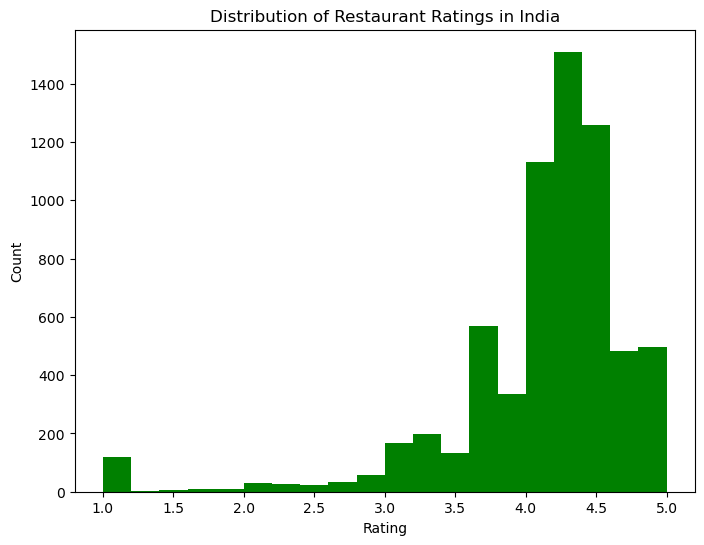

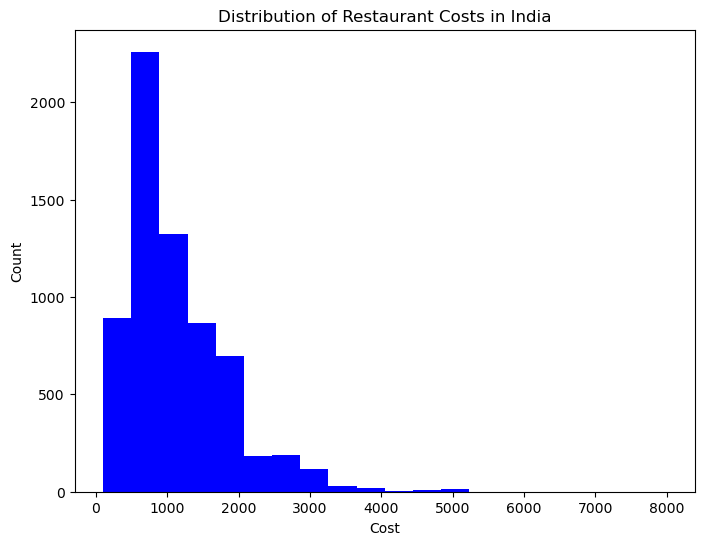

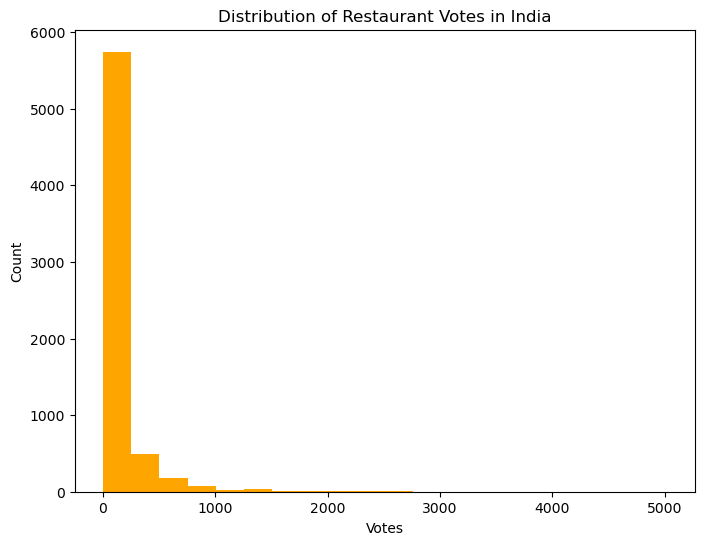

In [13]:
# Rating distribution
plt.figure(figsize=(8,6))
plt.hist(df['Rating'], bins=20, color='green')
plt.title('Distribution of Restaurant Ratings in India')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Cost distribution
plt.figure(figsize=(8,6))
plt.hist(df['Cost'], bins=20, color='blue')
plt.title('Distribution of Restaurant Costs in India')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

# Votes distribution
plt.figure(figsize=(8,6))
plt.hist(df['Votes'], bins=20, color='orange')
plt.title('Distribution of Restaurant Votes in India')
plt.xlabel('Votes')
plt.ylabel('Count')
plt.show()

### Distribution of Restaurants across Cities in India

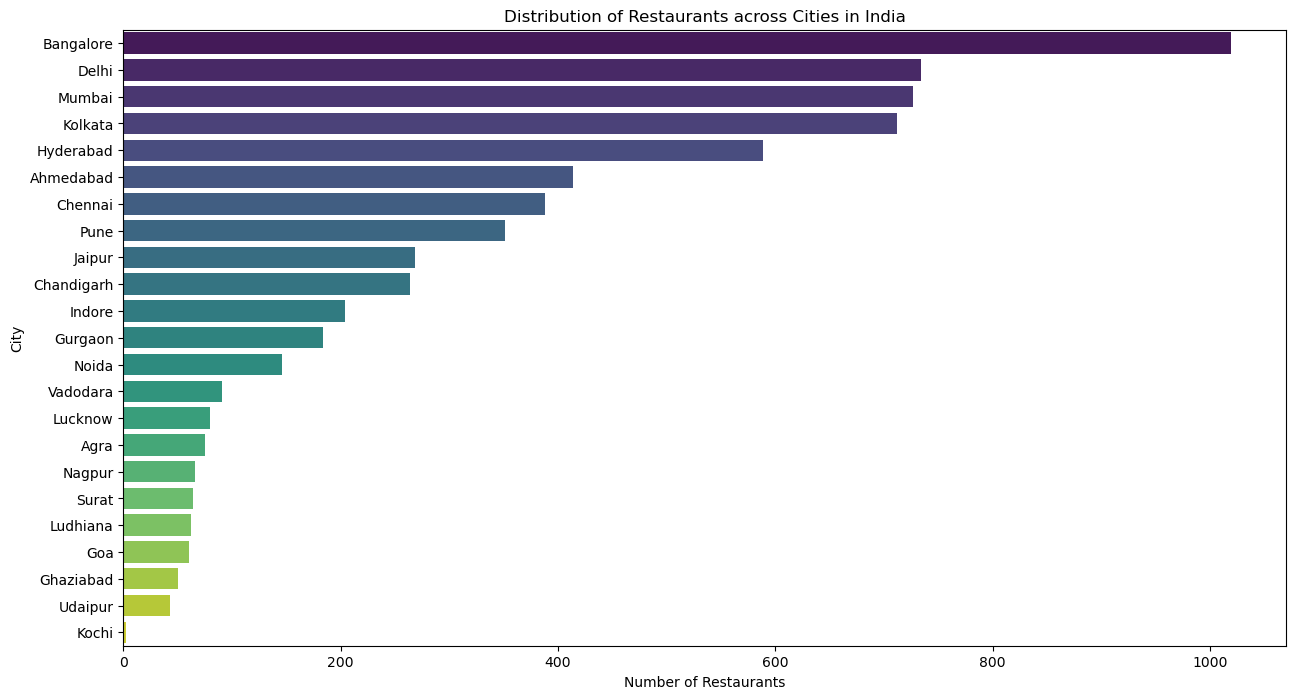

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(y = 'City', data = df, order = df['City'].value_counts().index, palette = 'viridis')
plt.title('Distribution of Restaurants across Cities in India')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [15]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'State' is a column in it
df_state = df.groupby('State').mean(numeric_only=True)  # Explicitly set numeric_only to True


In [16]:
# Forming state-wise dataframe
df_state = df.groupby('State').mean()
df_state.reset_index(level = 0, inplace = True)
df_state

/tmp/ipykernel_20/2784565271.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = df.groupby('State').mean()


,State,Rating,Votes,Cost
0,Bengal,3.990590,108.025281,880.897472
1,Delhi NCR,4.196589,268.772890,1516.921005
2,Goa,4.153333,27.216667,1480.000000
3,Gujrat,4.164675,43.014060,743.233743
4,Karnataka,4.029931,100.210010,924.288518
5,Kerala,3.400000,8.500000,650.000000
6,Madhya Pradesh,3.790686,55.382353,1017.892157
7,Maharashtra,4.146591,100.781469,1205.594406
8,Punjab,4.094785,47.055215,1033.742331
9,Rajasthan,4.090032,40.488746,1145.337621


# RATING DISTRIBUTION ACROSS STATES

/tmp/ipykernel_20/614585437.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = df.groupby('State').mean()


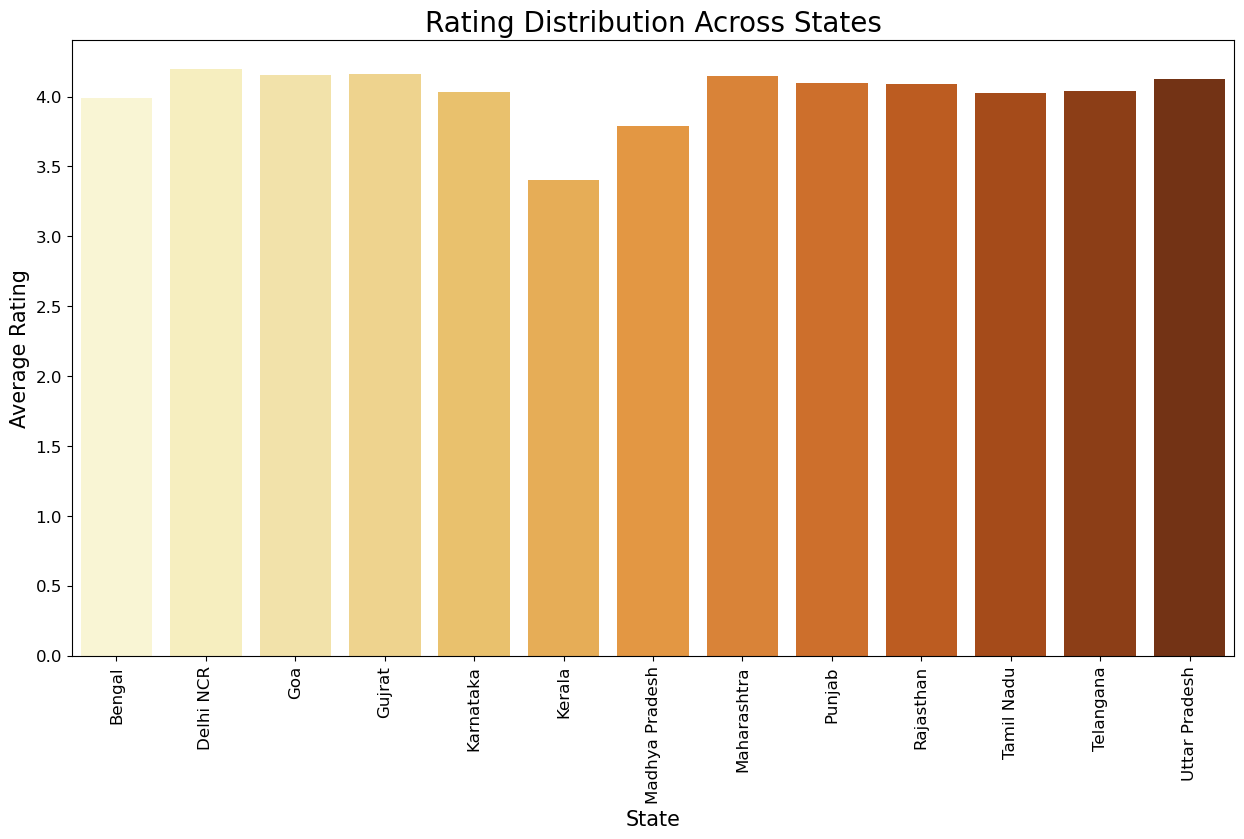

In [17]:
# Forming state-wise dataframe
df_state = df.groupby('State').mean()
df_state.reset_index(level = 0, inplace = True)

# Plotting the state-wise rating distribution
plt.figure(figsize=(15,8))
sns.barplot(x='State', y='Rating', data=df_state, palette='YlOrBr')
plt.title('Rating Distribution Across States', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# OBSERVATION

#### COMPARISION OF RATING ACROSS STATES

In [18]:
fig = px.bar(df_state, x='State', y='Rating', color='State', 
             title='Comparison of Ratings Across States',
             labels={'State':'State', 'Rating':'Average Rating'})
fig.show()

### Comparison of Average Dining Cost Across States

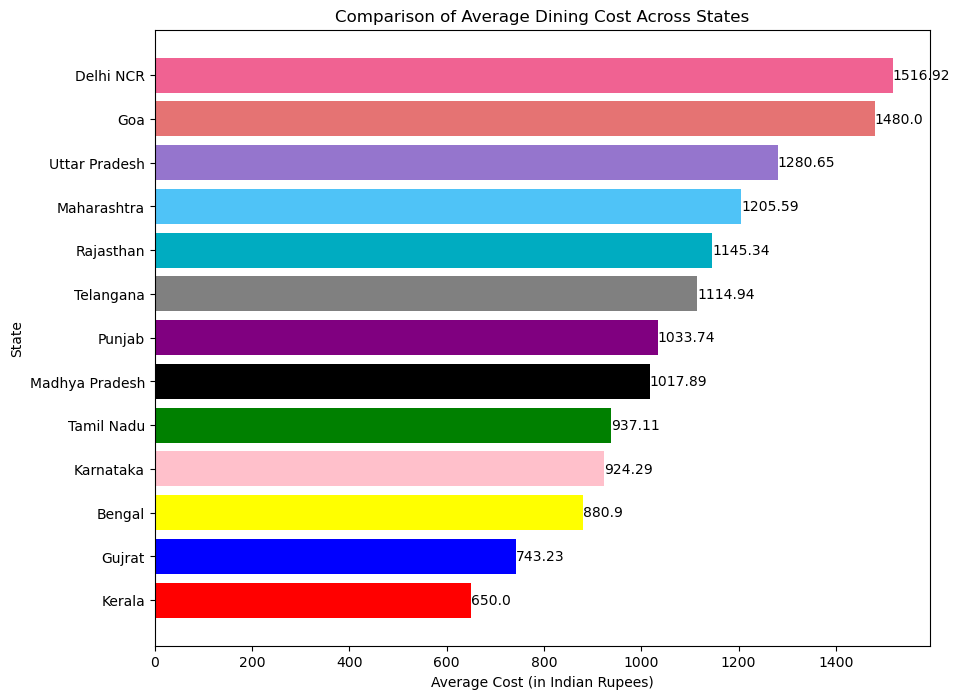

In [19]:
# create a dataframe with average cost by state
df_cost = df.groupby('State')['Cost'].mean().reset_index()

# sort the dataframe by cost
df_cost = df_cost.sort_values('Cost')

# set color palette
colors = ['red','blue','yellow','pink','green','black','purple','gray','#00ACC1','#4FC3F7','#9575CD','#E57373','#F06292','#BA68C8','#F48FB1','#BDBDBD','#90A4AE','#80DEEA','#FFD54F','#F44336']

# plot the data as a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_cost['State'], df_cost['Cost'], color=colors)
plt.title('Comparison of Average Dining Cost Across States')
plt.xlabel('Average Cost (in Indian Rupees)')
plt.ylabel('State')

# add value labels to the bars
for index, value in enumerate(df_cost['Cost']):
    plt.text(value, index, str(round(value,2)), color='black', fontsize=10, ha='left', va='center')

plt.show()

# Comparison of Average Dining Cost Across Cities

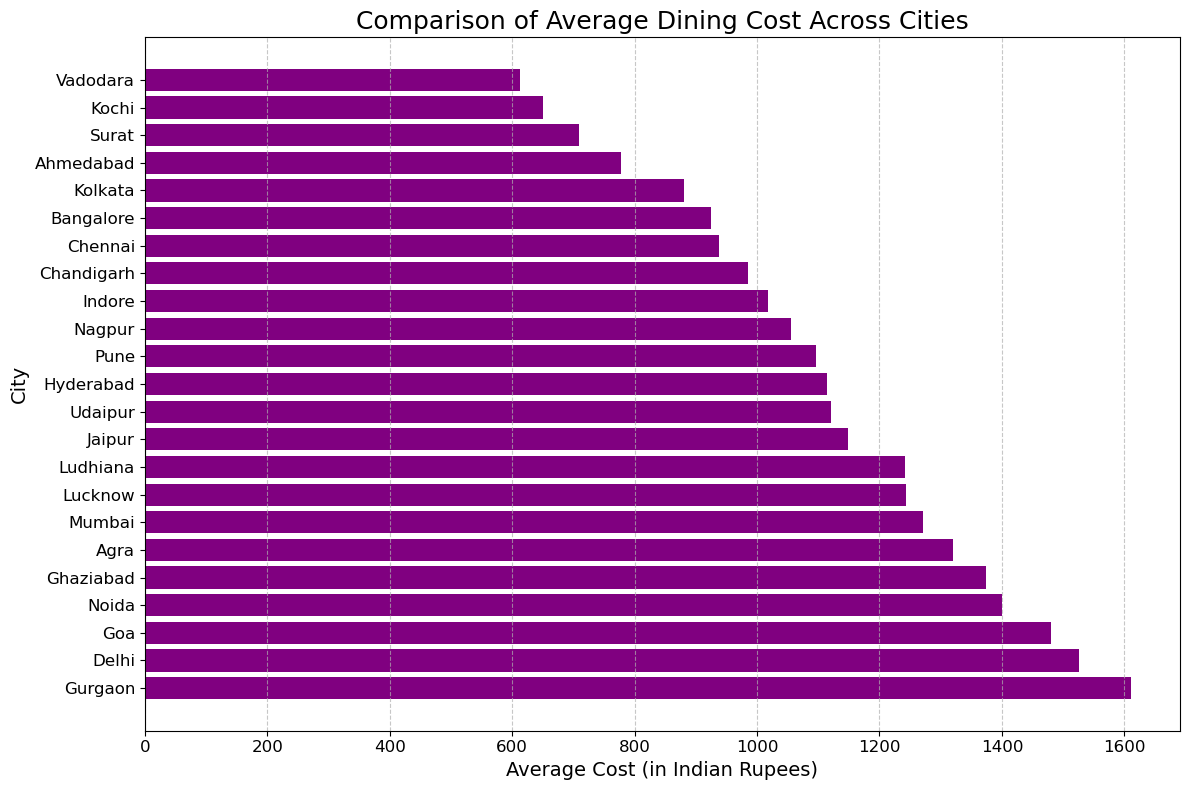

In [20]:
# create a dataframe with average cost by city
df_cost_city = df.groupby('City')['Cost'].mean().reset_index()

# sort the dataframe by cost
df_cost_city = df_cost_city.sort_values('Cost')

# plot the data as a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(df_cost_city['City'], df_cost_city['Cost'], color='purple')
plt.title('Comparison of Average Dining Cost Across Cities', fontsize=18)
plt.xlabel('Average Cost (in Indian Rupees)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# comparison od average rating across states

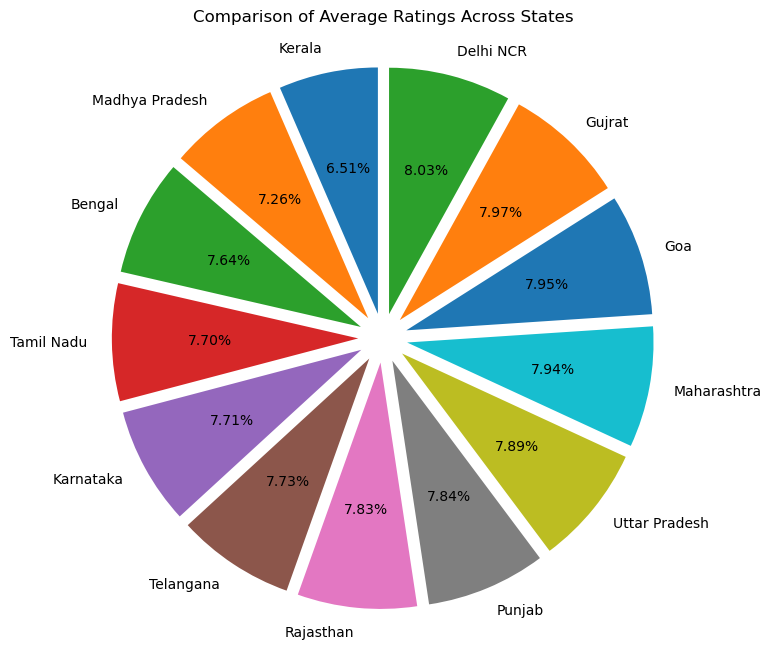

In [21]:
# create a dataframe with average rating by state
df_rating = df.groupby('State')['Rating'].mean().reset_index()

# sort the dataframe by rating
df_rating = df_rating.sort_values('Rating')

# create a pie chart
plt.figure(figsize=(8,8))
plt.pie(df_rating['Rating'], labels=df_rating['State'], autopct='%2.2f%%', startangle=90, explode=[0.1]*len(df_rating))
plt.title('Comparison of Average Ratings Across States')
plt.show()

# state wise distribution

In [22]:
df_state

,State,Rating,Votes,Cost
0,Bengal,3.990590,108.025281,880.897472
1,Delhi NCR,4.196589,268.772890,1516.921005
2,Goa,4.153333,27.216667,1480.000000
3,Gujrat,4.164675,43.014060,743.233743
4,Karnataka,4.029931,100.210010,924.288518
5,Kerala,3.400000,8.500000,650.000000
6,Madhya Pradesh,3.790686,55.382353,1017.892157
7,Maharashtra,4.146591,100.781469,1205.594406
8,Punjab,4.094785,47.055215,1033.742331
9,Rajasthan,4.090032,40.488746,1145.337621


In [23]:
# group the data by state and sum the votes
df_votes = df_state.groupby('State')['Votes'].sum().reset_index()

# create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=df_votes['State'],
    values=df_votes['Votes'],
    textinfo='value+percent',
    hole=.4,
    sort=False,
    marker=dict(colors=px.colors.qualitative.Dark2))
])

# add title and customize layout
fig.update_layout(title='Votes Distribution Across States',
                  title_x=0.5,
                  annotations=[dict(text='Votes', font_size=30, showarrow=False)],
                  showlegend=False)

fig.show()

# Top cuisines in India

In [24]:
# group the data by city and cuisine and count the number of restaurants
df_cuisine = df.groupby(['City', 'Cuisine'])['Name'].count().reset_index()

# get the top cuisine for each city
df_top_cuisine = df_cuisine.loc[df_cuisine.groupby('City')['Name'].idxmax()]

# create the bar chart
fig = px.bar(df_top_cuisine, x='City', y='Name', color='Cuisine',
             labels={'City': 'City', 'Name': 'Number of Restaurants'},
             title='Top Cuisine in Each City')
fig.show()

a description of the EDA
Okay, so in our EDA on Indian restaurants, we took the following actions:
After loading the relevant libraries, we imported the dataset. Then, if any null values were discovered, we addressed them.

We looked at the basic statistics of the dataset and visualised the distribution of the variables. The relationships between the various variables were also looked at.

We used the analysis' results to rank the top restaurants and geographical areas. We also looked at the distribution of restaurants across Indian states and cities.

The votes, ratings, and meal prices from various states and cities were then compared. We also took into account the top eateries in India.
Overall, we have run numerous analyses on this dataset, even while